<font color = 'Purple'  size = 3>
    
# 02 - Regresión Lineal y Logística 

Importamos las librerías de utilidad.

In [1]:
import torch
import numpy as np
import torch.nn as nn                # Módulo de redes neuronales para implementar una regresión lineal.        
import torch.optim as optim          # Módulo para calcular la optimización del gradiente.
import matplotlib.pyplot as plt 

<font color = 'brown'  size = 2>
    
# Caso 1 - Regresión Lineal 

Realicemos un ejemplo muy sencillo en el que queremos determinar la función lineal que se ajusta a los datos correspondientes a unidades de coches vendidas vs precio de los coches. 

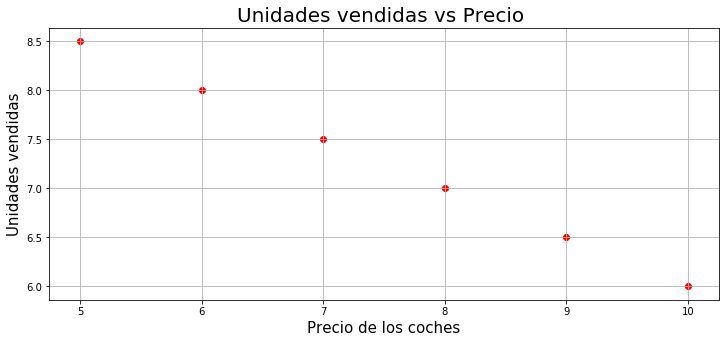

In [2]:
precio_coches = [5,6,7,8,9,10]                             # Precio de los coches con entradas enteras.
unidades_vendidas = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]         # Unidades vendidas con entradas flotantes. 

# Gráfica del precio de coches vs unidades vendidas.
plt.figure(figsize = (12, 5))
plt.scatter(precio_coches, unidades_vendidas, color = 'red')
plt.grid(True)
plt.title('Unidades vendidas vs Precio ', size = 20)
plt.xlabel('Precio de los coches', size = 15)
plt.ylabel('Unidades vendidas', size = 15);

Los arreglos correspondientes al precio de los coches y las unidades vendidas los tranformamos en un nuevo arreglo usando Numpy.

In [3]:
arreglo_precios = np.array(precio_coches).reshape(-1,1) 
arreglo_unidades = np.array(unidades_vendidas).reshape(-1,1)     

print(arreglo_precios)
arreglo_unidades

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


array([[8.5],
       [8. ],
       [7.5],
       [7. ],
       [6.5],
       [6. ]])

Los arreglos ahora los convertimos en tensores con valores flotantes. Para el caso de los precios activamos los gradientes.

In [4]:
prices = torch.from_numpy(arreglo_precios).float().requires_grad_(True)  
units = torch.from_numpy(arreglo_unidades).float()                       

print(prices, prices.shape)
units, units.shape

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True) torch.Size([6, 1])


(tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]),
 torch.Size([6, 1]))

Creamos el modelo de entrenamiento correspondiente a la regresión lineal.

C:\Users\User01\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Último valor del loss:  0.01839698664844036


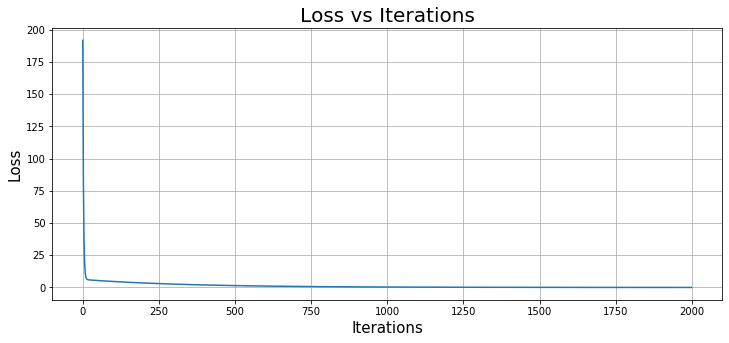

In [5]:
model = nn.Linear(1,1)                                   # Uso del módulo nn para hacer un modelo lineal con dimensiones 1 y 1.
loss_function = nn.MSELoss()                             # Función de pérdida conocidad como "Mean Squared Error". 
optimizer = optim.SGD(model.parameters(), lr = 0.015)    # Optimización del modelo con "Stochastic Gradient Descent".
losses = []                                              # Usamos una taza de aprendizaje de 0.015.
iterations = 2000                                        # Hacemos 2000 iteraciones para que el sistema 'aprenda'.

# Ciclo de entrenamiento.
for i in range(iterations):                    
    pred = model(prices)
    loss = loss_function(pred, units)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Último valor del loss: ', float(loss))            # Valor de la última pérdida.

# Gráfica de la perdida vs iteraciones.
plt.figure(figsize = (12, 5))
plt.plot(range(iterations), losses) 
plt.grid(True)
plt.title('Loss vs Iterations', size = 20)
plt.xlabel('Iterations', size = 15)
plt.ylabel('Loss', size = 15);

Una vez entrenado el sistema podemos hacer inferencias, en decir, predicciones sobre las unidades vendidas dado el precio de los coches.

In [6]:
# Consideremos un coche con un precio de 4.0.
entrada = torch.Tensor([[4.0]])    # Variable de entrada.
inferencia = model(entrada)                 # Usamos el modelo realizado para inferir la cantidad de unidades que se venderan.
inferencia

tensor([[8.6995]], grad_fn=<AddmmBackward>)

Este resultado nos idica que habrán aproximadamente 8 o 9 coches vendidos con un precio de '4.0'.

<font color = 'brown'  size = 2>
    
# Caso 2 - Regresión Logística 

El ejemplo a realizar es la clasificación de un conjunto de $200$ muestras $(x, y)$ en dos categorias.

In [7]:
muestras = 200              # Número de muestras (x,y).
separacion = muestras // 2  # Dividmos las muestras, la mitad en la parte inferior de la gráfica y la otra en la parte superior.
dimension = 2               # Dimensión 2 porque son parejas ordenadas.

#Generamos las muestras de maneara aleatoria.
datos = np.random.randn(muestras, dimension) * 5
datos                       # Mostramos lso valores de las parejas ordenadas. 

array([[ 6.88377601e+00,  1.31328386e+00],
       [ 1.13514235e+01, -5.15431678e+00],
       [ 7.72439196e+00,  6.11022541e-01],
       [-5.02896109e+00,  8.46590621e-02],
       [-3.30299994e-01,  2.07196346e+00],
       [-1.88999350e+00, -2.84068027e+00],
       [-1.04075653e+01, -4.61398379e+00],
       [ 4.27890614e+00, -5.19362712e+00],
       [-1.24314941e+01, -2.86473064e+00],
       [-2.32530085e+00, -1.42358395e+00],
       [-9.04124044e+00, -2.78190030e+00],
       [ 2.44812790e+00,  3.47435204e-01],
       [ 3.76773186e+00, -6.63411828e+00],
       [ 5.47425803e+00, -8.18456582e-01],
       [-2.78757823e+00, -5.08484273e-01],
       [ 1.64432172e+01, -2.16191356e+00],
       [ 4.80001659e+00, -5.58061454e+00],
       [-3.56354046e-01, -6.69433042e+00],
       [-1.46154855e+00,  1.35749779e+00],
       [-4.26012315e+00, -1.50312848e+00],
       [-8.15886789e+00,  5.52857060e+00],
       [ 3.29201709e+00, -1.34529570e+01],
       [ 4.23003711e-01, -5.51043836e+00],
       [-2.

Mostramos gráficamente la distribución de las muestras.

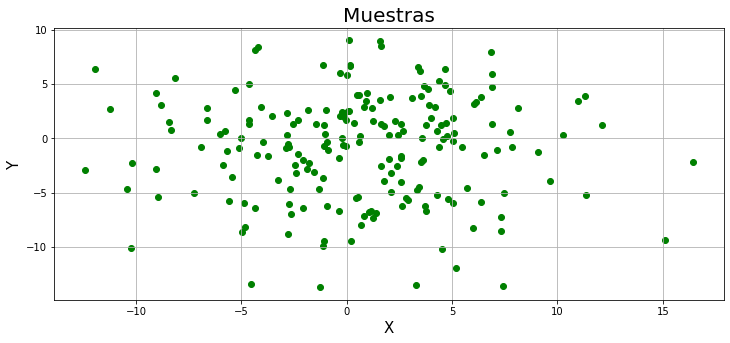

In [8]:
plt.figure(figsize = (12, 5))
plt.scatter(datos[:,0], datos[:,1], color = 'green')
plt.grid(True)
plt.title('Muestras', size = 20)
plt.xlabel('X', size = 15)
plt.ylabel('Y', size = 15);

Redistribuimos los datos para tener una mejor visualización de la clasificación.

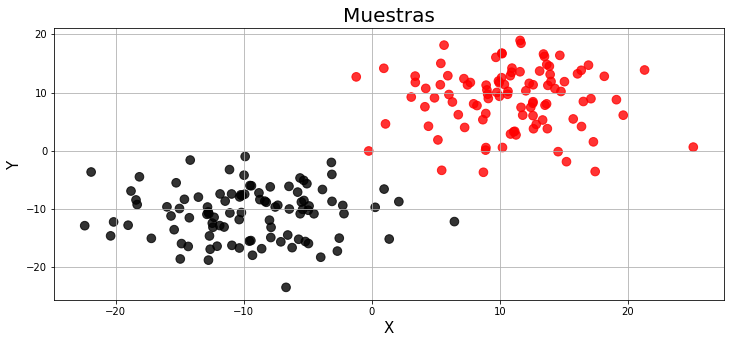

In [10]:
# Centramos la primera mitad de datos en (-5,-5) y la segunda mitad en (5,5).
datos[:separacion, :] = datos[:separacion, :] - 5 * np.ones((separacion, dimension))           
datos[separacion:, :] = datos[separacion:, :] + 5 * np.ones((separacion, dimension))           
colores = ["black", "red"]

# Cada mitad de puntos los cambiamos de color.
color = np.array([colores[0]] * separacion + [colores[1]] * separacion).reshape(muestras)  

# Grafica de las muestras.
plt.figure(figsize = (12, 5))
plt.scatter(datos[:, 0], datos[:, 1], c = color, s = 75, alpha = 0.8) 
plt.grid(True)
plt.title('Muestras', size = 20)
plt.xlabel('X', size = 15)
plt.ylabel('Y', size = 15);

In [11]:
#La salida será uno de dos valores, la mitad seran 0´s y la otra mitad seran 1´s.
salida = np.array([0] * separacion + [1] * separacion).reshape(muestras, 1)   

x = torch.from_numpy(datos).float().requires_grad_(True)  # La variable de entrada corresponde a las muestras.
y = torch.from_numpy(salida).float()                      # La salida será uno de dos valores, 0´s o 1´s.
x.shape, y.shape                                          # Forma de los tensores.

(torch.Size([200, 2]), torch.Size([200, 1]))

Creamos el modelo de entrenamiento para la regresión logística.

Último valor del loss:  0.008370157331228256


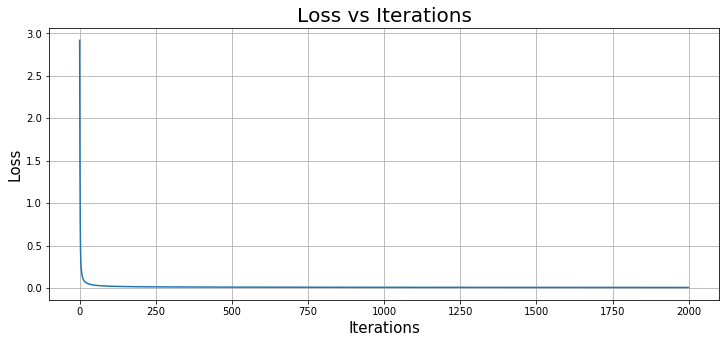

In [12]:
model = nn.Sequential(                                # Sequential permite combinar multiples funciones.
          nn.Linear(2,1),
          nn.Sigmoid()                                # La función sigmoide garantiza tener resultados entre 0 y 1. 
     )
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
losses = []
iterations = 2000

# Ciclo de entrenamiento.
for i in range(iterations):
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print('Último valor del loss: ', float(loss))          # Valor de la última pérdida.

# Gráfica de la perdida vs iteraciones.
plt.figure(figsize = (12, 5))
plt.plot(range(iterations), losses) 
plt.grid(True)
plt.title('Loss vs Iterations', size = 20)
plt.xlabel('Iterations', size = 15)
plt.ylabel('Loss', size = 15);

Una vez entrenado el sistema realicemos una prueba sobre la clasificación.

In [15]:
negro = torch.Tensor([[-5, -6]])
prediccion = model(negro).data[0][0] > 0.5
print(colores[prediccion])

rojo = torch.Tensor([[8, 6]])
prediccion = model(rojo).data[0][0] > 0.5
print(colores[prediccion])

black
red


Realicemos una división sobre los datos para visualizar mejor la clasificación.

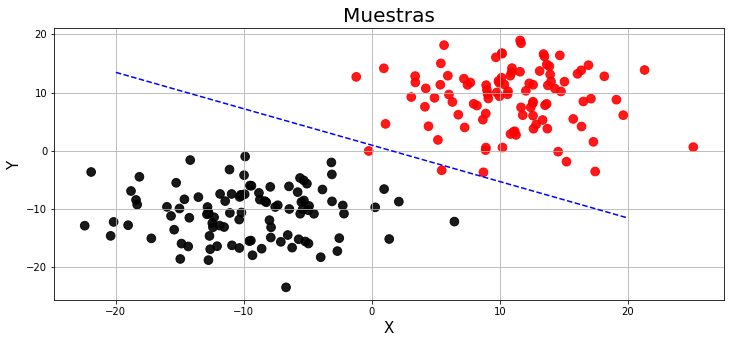

In [24]:
#Pesos del modelo
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Grafica de las muestras.
plt.figure(figsize = (12, 5))
plt.scatter(datos[:,0], datos[:,1], c = color, s = 75, alpha = 0.9)
plt.grid(True)
plt.title('Muestras', size = 20)
plt.xlabel('X', size = 15)
plt.ylabel('Y', size = 15);

#Grafica de una línea que separa a los puntos.
eje_x = np.linspace(-20, 20, muestras)
eje_y = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(eje_x, eje_y, "g--", color = 'blue')